In [97]:
import pandas as pd
import numpy as np

In [98]:
df = pd.read_csv("spam.csv", encoding_errors="ignore")

In [99]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4810,ham,E admin building there? I might b slightly ear...,NaN,NaN,NaN
938,spam,Urgent! call 09061749602 from Landline. Your c...,NaN,NaN,NaN
2907,ham,Why must we sit around and wait for summer day...,NaN,NaN,NaN
4317,ham,S...i will take mokka players only:),NaN,NaN,NaN
2879,spam,Last Chance! Claim ur 150 worth of discount vo...,NaN,NaN,NaN


In [100]:
df.shape

(5572, 5)

# Data Cleaning

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


# drop last 3 column since it doesnt have munch data and almost empty

In [102]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [103]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will _ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Rename Column

In [104]:
df.rename(columns={'v1' : 'target', 'v2' : 'text'}, inplace = True)

### encoding the name ham and spam as o, 1

In [105]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [106]:
df['target'] = encoder.fit_transform(df['target'])

In [107]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [108]:
# duplicate values
df.duplicated().sum()

np.int64(404)

In [109]:
# remove duplicate
df.drop_duplicates(keep = 'first', inplace=True)

# EDA

In [110]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df['target'].value_counts()

target
0    4516
1     652
Name: count, dtype: int64

In [112]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x2391e3ab4d0>,
 [Text(-1.014725450968414, 0.42465545935140026, 'ham'),
  Text(1.0147253868472121, -0.42465561257067574, 'spam')],
 [Text(-0.5534866096191349, 0.2316302505553092, '87.38'),
  Text(0.5534865746439338, -0.23163033412945946, '12.62')])

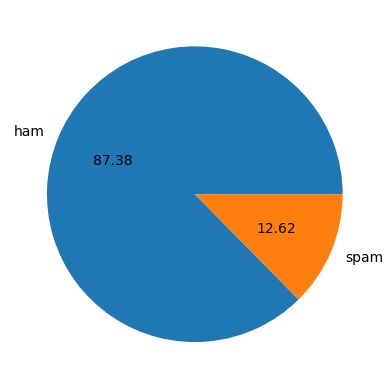

In [113]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')

# Data is imbalance we having more ham messages than spam

In [114]:
import nltk

# adding feature like counts of chars, word and sentences

In [115]:
df['num_char'] = df['text'].apply(len)

In [116]:
df

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159
5568,0,Will _ b going to esplanade fr home?,36
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [117]:
# words counts
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [118]:
# sentence counts
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [119]:
df

,target,text,num_char,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4
5568,0,Will _ b going to esplanade fr home?,36,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [120]:
df.describe()

,target,num_char,num_words,num_sent
count,5168.000000,5168.000000,5168.000000,5168.000000
mean,0.126161,78.759481,18.441176,1.966331
std,0.332063,58.104099,13.327587,1.449367
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,116.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [121]:
# ham messages
df[df['target'] == 0].describe()

,target,num_char,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.344110,17.108946,1.819973
std,0.0,56.328803,13.494730,1.383228
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [122]:
# spam messages
df[df['target'] == 1].describe()

,target,num_char,num_words,num_sent
count,652.0,652.000000,652.000000,652.000000
mean,1.0,137.047546,27.668712,2.980061
std,0.0,29.937352,7.015283,1.491780
min,1.0,13.000000,2.000000,1.000000
25%,1.0,130.000000,25.000000,2.000000
50%,1.0,148.000000,29.000000,3.000000
75%,1.0,156.000000,32.000000,4.000000
max,1.0,222.000000,46.000000,9.000000


# mean of no of counts for ham messages is 70 and for spam is 137 that shows spam are usually larges messages

In [123]:
import seaborn as sns

<Axes: xlabel='num_char', ylabel='Count'>

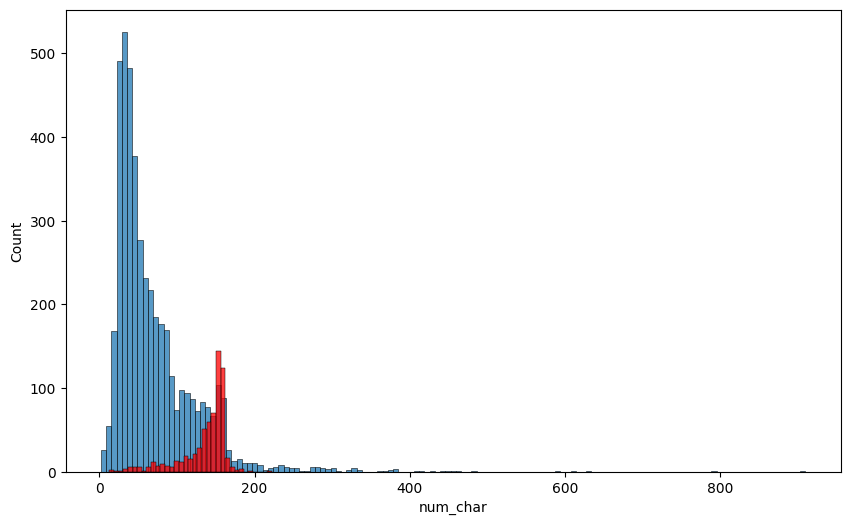

In [124]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0] ['num_char'])
sns.histplot(df[df['target'] == 1] ['num_char'], color ="red")

<Axes: xlabel='num_words', ylabel='Count'>

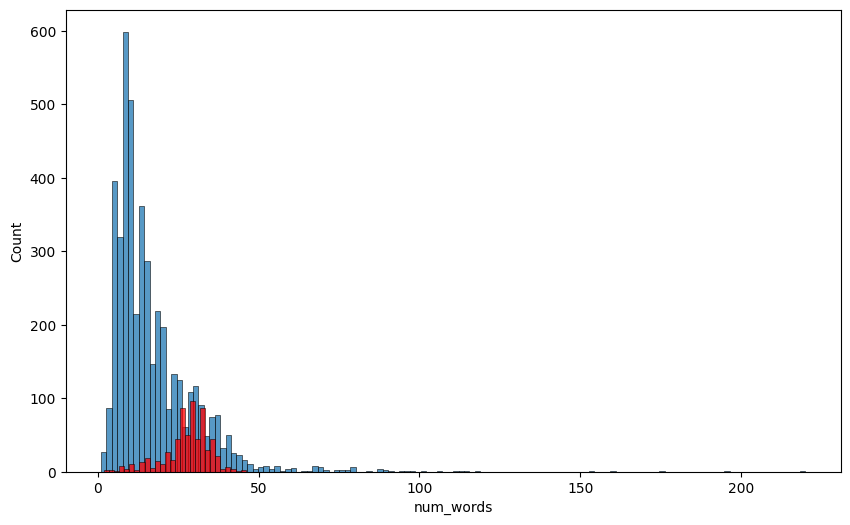

In [125]:
plt.figure(figsize = (10,6))
sns.histplot(df[df['target'] == 0] ['num_words'])
sns.histplot(df[df['target'] == 1] ['num_words'], color ="red")

# chart clearly shows no of ham messsages usualy have less characters and less words compare to spam messages

# lest see the correlation that will show relationship between these columns

<Axes: >

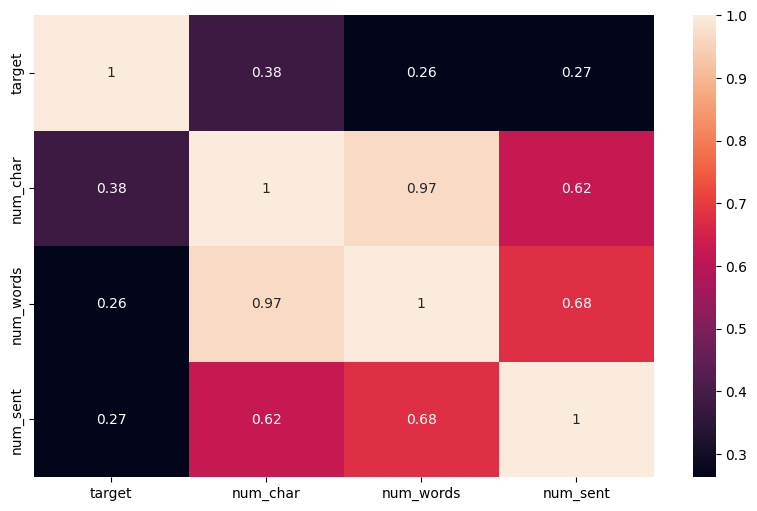

In [126]:
plt.figure(figsize = (10,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)

# we have num_char and num_words with high correlation that show multicolanirity ! 

# Data Preprocessing

## removing special characters and converting to lower case

In [127]:
# import string and  stopwords from nltk 
from nltk.corpus import stopwords
import string as str
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [128]:
def tranform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []

    # remove special characters 
    for i in text:
        if i.isalnum():
            y.append(i)

    # remove stop words and puntuation
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words("english") and i not in str.punctuation:
            y.append(i)

    # using stemming to convert all words into their root formn
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [129]:
text = "Hi How Are You ajay?"
tranform_text(text)

'hi ajay'

In [130]:
df['transformed_text'] = df['text'].apply(tranform_text)

In [131]:
df

,target,text,num_char,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,159,35,4,2nd time tri 2 contact u 750 pound prize 2 cla...
5568,0,Will _ b going to esplanade fr home?,36,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


## import wordcloud to visualize the mosty frequent words in spam and ham

In [132]:
from wordcloud import WordCloud

In [133]:
wc = WordCloud( width=600, height=600, min_font_size=10, background_color='white' )

# for spam

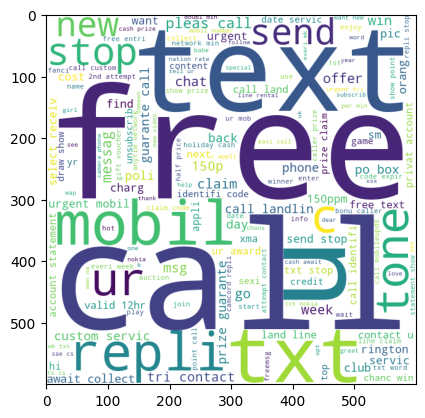

In [134]:
spam_wc = wc.generate(df[df['target'] == 1] ['transformed_text'].str.cat(sep=" ") )
plt.imshow(spam_wc)

# for ham

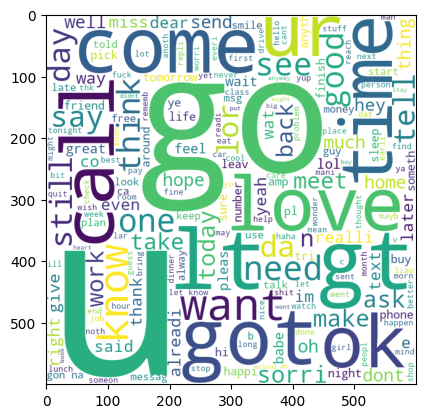

In [135]:
ham_wc = wc.generate(df[df['target'] == 0] ['transformed_text'].str.cat(sep=" ") )
plt.imshow(ham_wc)

# Model Building 

In [136]:
# import BOW vectorizer from sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [137]:
# convert vectorization of transformed text
x = cv.fit_transform(df['transformed_text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(5168, 6704))

In [138]:
y = df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5168,))

In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [140]:
# import machine learning models and measurement matrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [141]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

# Trying multiple models to find which one perform better

In [142]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8829787234042553
[[792 101]
 [ 20 121]]
0.545045045045045


In [143]:
bnb.fit(x_train, y_train)
y_pred2 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[890   3]
 [ 33 108]]
0.972972972972973


In [144]:
mnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9632495164410058
[[868  25]
 [ 13 128]]
0.8366013071895425


### Bernoulli works the best out of all threee

# Using TfidfVectorizer to compare with BOW which one perform better

In [145]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

# Split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [146]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074


In [147]:
mnb.fit(x_train, y_train)
y_pred3 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9535783365570599
[[893   0]
 [ 48  93]]
1.0


In [148]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8771760154738878
[[792 101]
 [ 26 115]]
0.5324074074074074


# Multinomial works best shows precision 1 which ios great comapre to any other model

# Importing other machine learning models and comparing for best results

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [150]:
svc = SVC(kernel='sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=1)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [151]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BGC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'XGB':xgb
        }

In [152]:
def train_classifier(clf, xtrain, ytrain, xtest, ytest):
    clf.fit(xtrain, ytrain)
    ypred = clf.predict(xtest)
    accuracy = accuracy_score(ytest, ypred)
    precision = precision_score(ytest, ypred)

    return accuracy, precision

In [153]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    curr_accuracy, curr_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For ", name)
    print("Accuracy ", curr_accuracy)
    print("Precision", curr_precision)

    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

For  SVC
Accuracy  0.9748549323017408
Precision 0.9831932773109243
For  KN
Accuracy  0.8945841392649904
Precision 1.0
For  NB
Accuracy  0.9535783365570599
Precision 1.0
For  DT
Accuracy  0.9313346228239845
Precision 0.8645833333333334
For  LR
Accuracy  0.9516441005802708
Precision 0.9504950495049505
For  RF
Accuracy  0.9709864603481625
Precision 0.9911504424778761
For  AdaBoost
Accuracy  0.9235976789168279
Precision 0.8444444444444444
For  BGC
Accuracy  0.9584139264990329
Precision 0.8769230769230769
For  ETC
Accuracy  0.9748549323017408
Precision 1.0
For  GBDT
Accuracy  0.9468085106382979
Precision 0.8981481481481481
For  XGB
Accuracy  0.9709864603481625
Precision 0.9586776859504132


In [154]:
performance_df1 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values(by=['Precision','Accuracy'], ascending=[False,False])

In [155]:
performance_df1

,Algorithm,Accuracy,Precision
8,ETC,0.974855,1.000000
2,NB,0.953578,1.000000
1,KN,0.894584,1.000000
5,RF,0.970986,0.991150
0,SVC,0.974855,0.983193
10,XGB,0.970986,0.958678
4,LR,0.951644,0.950495
9,GBDT,0.946809,0.898148
7,BGC,0.958414,0.876923
3,DT,0.931335,0.864583


In [156]:
df_melt1 = performance_df1.melt(
    id_vars = 'Algorithm',
    value_vars = ['Accuracy','Precision'],
    var_name = 'Metric',
    value_name = 'Score'
)

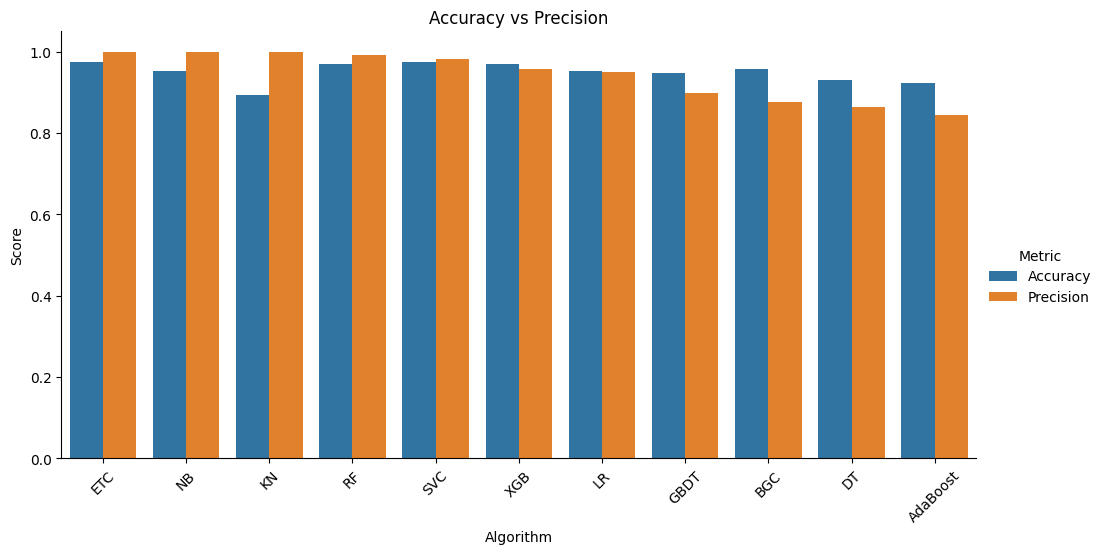

In [157]:
sns.catplot(data=df_melt1, x='Algorithm', y='Score', hue='Metric', kind='bar', 
            height = 5, aspect= 2)
plt.xticks(rotation=45)
plt.title("Accuracy vs Precision")
plt.show()

# Usinf tfidf vectorizer with cap features 

In [158]:
tfidf = TfidfVectorizer(max_features = 3000)
x = tfidf.fit_transform(df['transformed_text']).toarray()

# Split data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [159]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    curr_accuracy, curr_precision = train_classifier(clf, x_train, y_train, x_test, y_test)

    print("For ", name)
    print("Accuracy ", curr_accuracy)
    print("Precision", curr_precision)

    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

For  SVC
Accuracy  0.9748549323017408
Precision 0.9752066115702479
For  KN
Accuracy  0.902321083172147
Precision 1.0
For  NB
Accuracy  0.9709864603481625
Precision 1.0
For  DT
Accuracy  0.9352030947775629
Precision 0.9021739130434783
For  LR
Accuracy  0.9545454545454546
Precision 0.9519230769230769
For  RF
Accuracy  0.9709864603481625
Precision 0.9826086956521739
For  AdaBoost
Accuracy  0.925531914893617
Precision 0.872093023255814
For  BGC
Accuracy  0.9613152804642167
Precision 0.8854961832061069
For  ETC
Accuracy  0.97678916827853
Precision 0.975609756097561
For  GBDT
Accuracy  0.9429400386847195
Precision 0.9456521739130435
For  XGB
Accuracy  0.9671179883945842
Precision 0.9652173913043478


In [160]:
performance_df2 = pd.DataFrame({'Algorithm': clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values(by=['Precision_max_ft_3000','Accuracy_max_ft_3000'], ascending=[False,False])
performance_df2

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
2,NB,0.970986,1.000000
1,KN,0.902321,1.000000
5,RF,0.970986,0.982609
8,ETC,0.976789,0.975610
0,SVC,0.974855,0.975207
10,XGB,0.967118,0.965217
4,LR,0.954545,0.951923
9,GBDT,0.942940,0.945652
3,DT,0.935203,0.902174
7,BGC,0.961315,0.885496


In [161]:
df_melt2 = performance_df2.melt(
    id_vars = 'Algorithm',
    value_vars = ['Accuracy_max_ft_3000','Precision_max_ft_3000'],
    var_name = 'Metric',
    value_name = 'Score'
)

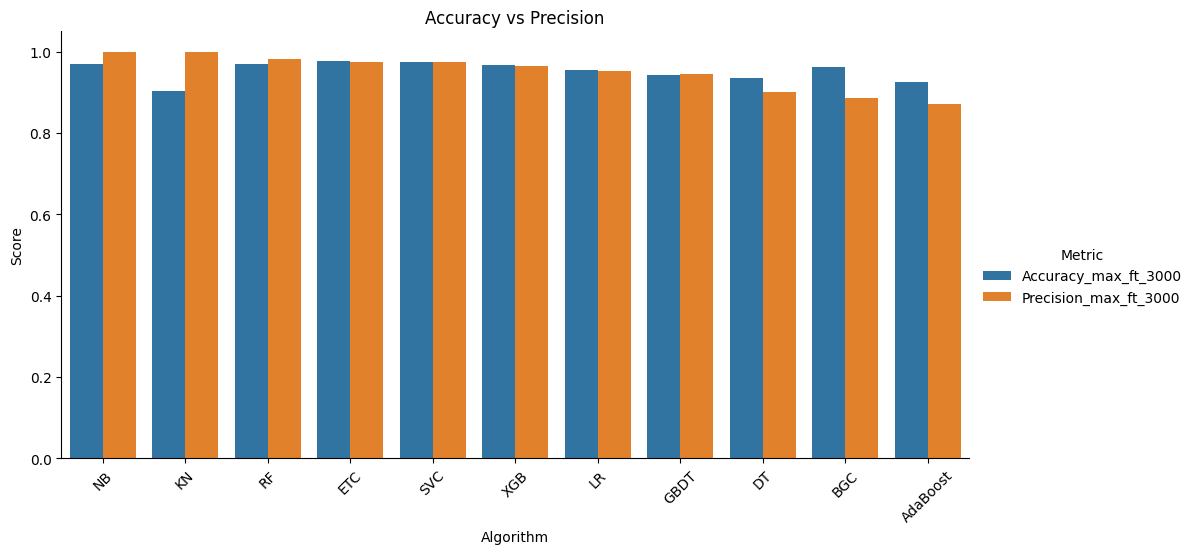

In [162]:
sns.catplot(data=df_melt2, x='Algorithm', y='Score', hue='Metric', kind='bar', 
            height = 5, aspect= 2)
plt.xticks(rotation=45)
plt.title("Accuracy vs Precision")
plt.show()